In [1]:
import os
import sys
from pathlib import Path
import numpy as np
repo_root = Path.cwd().parent
sys.path.append(str(repo_root))

folder_name = os.path.join(r'\\10.229.121.108','Workspace','PAT LINEAR','PATDOTUS','01')
from src.load_data_utils import list_subfolders, linear_us_param, linear_pa_param
import matplotlib.pyplot as plt

all_folders = list_subfolders(folder_name)
print(f"Found {len(all_folders)} image folders")
info_US = linear_us_param()
info_PA = linear_pa_param()

Found 31 image folders


In [2]:
# Estimate background mu at PAT wavelengths
from src.fluence_utils import estimate_so2_from_dot, query_bkg_mua_for_pa, fit_bkg_mus_for_pa
lambda_list_dot = [730   , 785   , 808   , 830]
mua_list_dot    = [0.032 , 0.038 , 0.037 , 0.041]
mus_list_dot    = [7.860 , 7.489 , 7.155 , 7.830]
decomp_dot      = estimate_so2_from_dot(lambda_list_dot , mua_list_dot , verbose=True)
lambda_list_pat = [770   , 780   , 800   , 830]
bkg_mua_pat = query_bkg_mua_for_pa(lambda_list_pat , decomp_dot['c_oxy'] , decomp_dot['c_deoxy'])
print("Background mua at PAT wavelengths are " , bkg_mua_pat['Background mua'] , " cm\u207B\u00B9")
bkg_mus_pat = fit_bkg_mus_for_pa(lambda_list_dot, mus_list_dot, lambda_list_pat)
print("Background mus at PAT wavelengths are " , bkg_mus_pat['Background mus'] , " cm\u207B\u00B9")

Estimated hemoglobin concentrations from DOT
[HbO2] = 5.22379 mmol/L
[Hb]   = 3.48574 mmol/L
sO2    = 59.98%
Background mua at PAT wavelengths are  [0.0426769  0.03994147 0.03705028 0.04018856]  cm⁻¹
Background mus at PAT wavelengths are  [7.62916908 7.60231057 7.54988587 7.4743008 ]  cm⁻¹


In [ ]:
# Initialize mua and mus maps
from src.recon_utils import generate_mu_init
wavelength_index = 1
pat_folder_index = 25
mu_a_bkg  = bkg_mua_pat['Background mua'][wavelength_index]
mu_sp_bkg = bkg_mus_pat['Background mus'][wavelength_index]
bbox_cm = (-1.25, 1.25, 0.10, 3.00)
scaling_factor = (4,5)
dz = info_PA.c / info_PA.fc / 2.0 * scaling_factor[1] * 100.0
dx = info_PA.c / info_PA.fc / 2.0 * scaling_factor[0] * 100.0
pixel_cm = (dz , dx)
input_dir = all_folders[pat_folder_index]
res = generate_mu_init(input_dir , info_US , info_PA , 
                       mu_a_mean_cm=mu_a_bkg , mu_s_mean_cm = mu_sp_bkg,
                       bbox_cm = bbox_cm , pixel_size_cm = pixel_cm)
print(res.keys())

mu maps initialized.
dict_keys(['US image', 'PAT image', 'mua0', 'mus0'])


In [4]:
'''
# Plot US and PAT images
fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
im0 = axes[0].imshow(res["US image"], cmap='gray', extent=[-info_US.FOV*50.0, info_US.FOV*50.0, 4.0, 0.0])
axes[0].set_title(r"US", fontsize=12)
axes[0].axis('off')
cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
cbar0.ax.tick_params(labelsize=10)
im1 = axes[1].imshow(res["PAT image"], cmap='hot', extent=[-info_PA.FOV*50.0, info_PA.FOV*50.0, 4.0, 0.0])
axes[1].set_title(r"PA", fontsize=12)
axes[1].axis('off')
cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=10)
# Plot initial mu_a and mu_s maps
xmin, xmax, zmin, zmax = bbox_cm
fig, axes = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
im0 = axes[0].imshow(res["mua0"], cmap='hot',  extent=[xmin, xmax, zmax, zmin])
axes[0].set_title(r"$\mu_a$", fontsize=12)
axes[0].axis('off')
cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
cbar0.ax.tick_params(labelsize=10)
im1 = axes[1].imshow(res["mus0"], cmap='turbo',  extent=[xmin, xmax, zmax, zmin])
axes[1].set_title(r"$\mu_s^{\prime}$", fontsize=12)
axes[1].axis('off')
cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=10)
'''

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Yixiao Lin\AppData\Local\Temp\ipykernel_17164\2245617444.py:18: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_title(r"$\mu_a$", fontsize=12)


'\n# Plot US and PAT images\nfig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)\nim0 = axes[0].imshow(res["US image"], cmap=\'gray\', extent=[-info_US.FOV*50.0, info_US.FOV*50.0, 4.0, 0.0])\naxes[0].set_title(r"US", fontsize=12)\naxes[0].axis(\'off\')\ncbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)\ncbar0.ax.tick_params(labelsize=10)\nim1 = axes[1].imshow(res["PAT image"], cmap=\'hot\', extent=[-info_PA.FOV*50.0, info_PA.FOV*50.0, 4.0, 0.0])\naxes[1].set_title(r"PA", fontsize=12)\naxes[1].axis(\'off\')\ncbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)\ncbar1.ax.tick_params(labelsize=10)\n# Plot initial mu_a and mu_s maps\nxmin, xmax, zmin, zmax = bbox_cm\nfig, axes = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)\nim0 = axes[0].imshow(res["mua0"], cmap=\'hot\',  extent=[xmin, xmax, zmax, zmin])\naxes[0].set_title(r"$\\mu_a$", fontsize=12)\naxes[0].axis(\'off\')\ncbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=

In [5]:
# Generate system matrix G
from src.pat_utils import generate_imaging_matrix , load_pa_rf_aligned
import cv2
use_daq_subsampling = False
G, G_meta = generate_imaging_matrix(bbox_cm , scaling_factor, info_PA, subsampling = use_daq_subsampling, verbose=True)
RF_data = load_pa_rf_aligned(input_dir , G_meta , info_PA, subsample = use_daq_subsampling)
# Make sure the shape of initialized mu maps match G
M,N = G_meta['X'].shape # Nz = M, Nx = N
mu_a0 = cv2.resize(res["mua0"] , (N,M) , interpolation = cv2.INTER_LINEAR)
mu_a0 = mu_a0.flatten(order='C')
mu_s0 = cv2.resize(res["mus0"] , (N,M) , interpolation = cv2.INTER_LINEAR)
mu_s0 = mu_s0.flatten(order='C')

Imaging grid: x from -1.2 cm to 1.2 cm with dx=0.04 cm (66 points)
              z from 0.1 cm to 3.0 cm with dz=0.05 cm (62 points)
Time axis: 1184 points, from 0.00 us to 29.57 us
System matrix generated. G has shape (151552, 4092) (dtype=float32)
RF data shape =  (128, 1184)
Raw PA data loaded and preprocessed.


In [6]:
# Main reconstruction function
# For N_iter = 50, it will take ~10 minutes
from src.recon_utils import optimize_mu_maps_regularize
N_iter = 75
lambda_mua = 0.25
lambda_mus = 1e-2
mu_a , mu_s , history = optimize_mu_maps_regularize(RF_data,
                                                    G,
                                                    mu_a_init = mu_a0,
                                                    mu_s_init = mu_s0,
                                                    global_mu_a_avg = mu_a_bkg,
                                                    global_mu_s_avg = mu_sp_bkg,
                                                    grid_shape = (M,N),
                                                    grid_spacing = pixel_cm,
                                                    n_iters = N_iter,
                                                    lam_mu_a = lambda_mua,
                                                    mu_s_step = 1e-5,
                                                    mu_s_reg_lambda = lambda_mus,
                                                    verbose = True,
                                                    )
print("Reconstruction complete.")
print(history.keys())

Iter   1 | resobj 5.416852e+04 | Δμ_s=7.047e-02 | Δμ_a=1.2621e+00 | sparsity=0.199
Iter   2 | resobj 5.416842e+04 | Δμ_s=1.711e-02 | Δμ_a=8.2873e-04 | sparsity=0.198
Iter   3 | resobj 5.416843e+04 | Δμ_s=1.351e-02 | Δμ_a=1.0502e-04 | sparsity=0.198
Iter   4 | resobj 5.416844e+04 | Δμ_s=1.124e-02 | Δμ_a=1.0477e-04 | sparsity=0.198
Iter   5 | resobj 5.416846e+04 | Δμ_s=9.661e-03 | Δμ_a=1.0071e-04 | sparsity=0.198
Iter   6 | resobj 5.416847e+04 | Δμ_s=8.494e-03 | Δμ_a=9.4774e-05 | sparsity=0.198
Iter   7 | resobj 5.416848e+04 | Δμ_s=7.597e-03 | Δμ_a=9.1110e-05 | sparsity=0.198
Iter   8 | resobj 5.416849e+04 | Δμ_s=6.886e-03 | Δμ_a=8.7413e-05 | sparsity=0.198
Iter   9 | resobj 5.416850e+04 | Δμ_s=6.307e-03 | Δμ_a=8.3601e-05 | sparsity=0.198
Iter  10 | resobj 5.416851e+04 | Δμ_s=5.825e-03 | Δμ_a=7.9206e-05 | sparsity=0.198
Iter  11 | resobj 5.416852e+04 | Δμ_s=5.416e-03 | Δμ_a=7.5752e-05 | sparsity=0.198
Iter  12 | resobj 5.416853e+04 | Δμ_s=5.065e-03 | Δμ_a=7.2563e-05 | sparsity=0.198
Iter

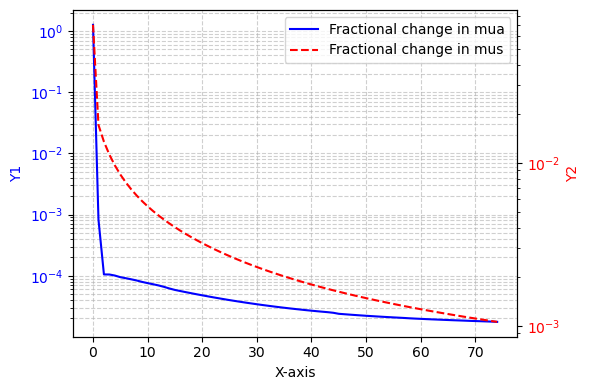

In [7]:
it = np.arange(N_iter)
fig, ax1 = plt.subplots(figsize=(6, 4))

# Left y-axis (log scale)
ax1.plot(it, history['mua frac change'], 'b-', label='Fractional change in mua')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y1', color='b')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='b')

# Right y-axis (log scale)
ax2 = ax1.twinx()
ax2.plot(it, history['mus frac change'], 'r--', label='Fractional change in mus')
ax2.set_ylabel('Y2', color='r')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='r')

# Optional: grid and title
ax1.grid(True, which='both', linestyle='--', alpha=0.6)
# Add legends (handle both axes)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.tight_layout()
plt.show()

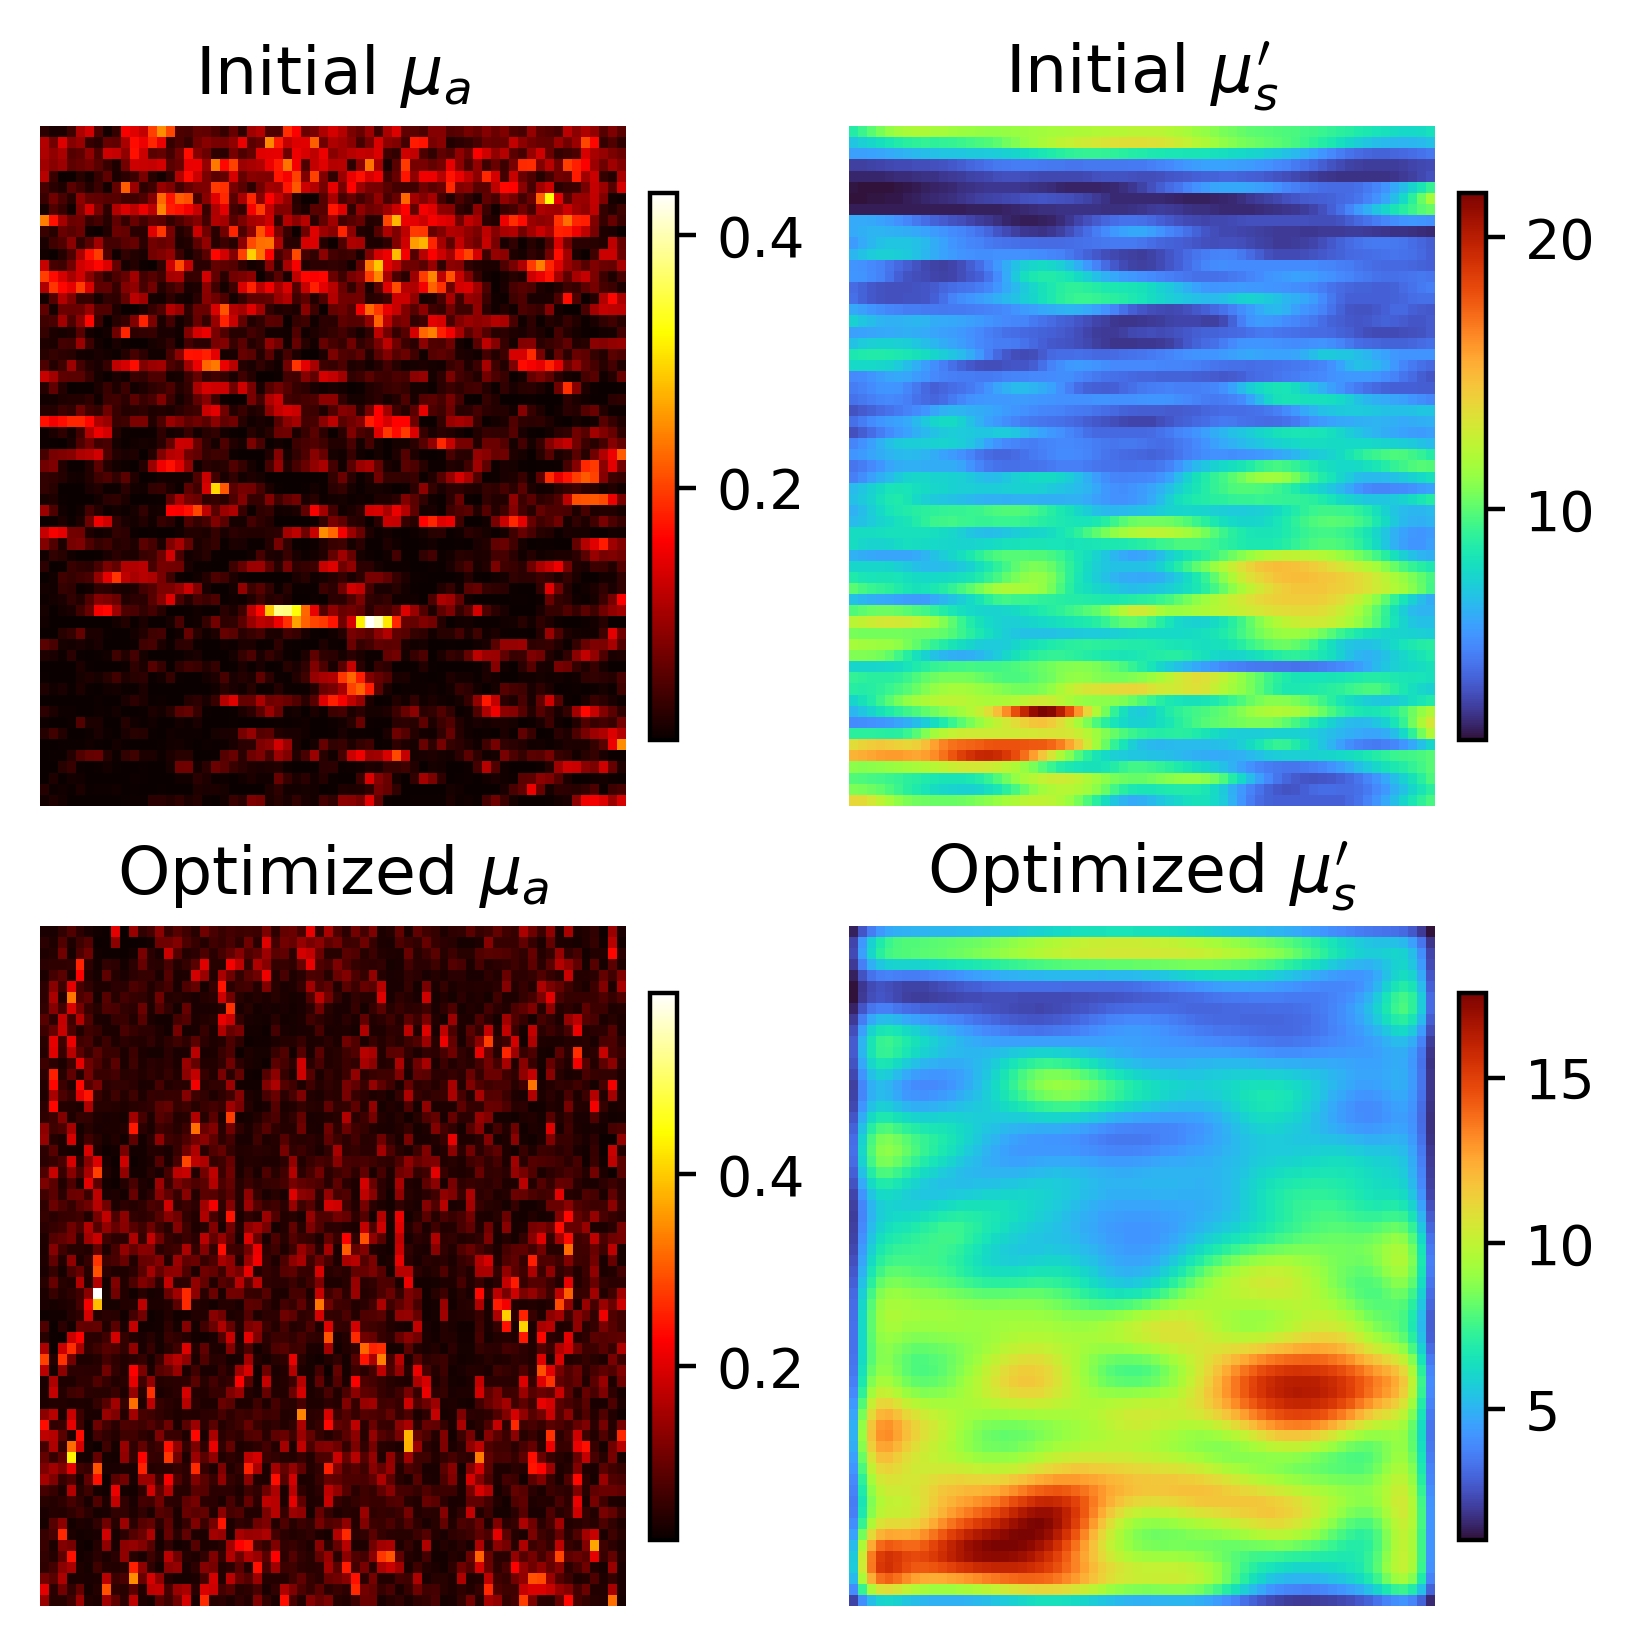

In [ ]:
# Plot initial mu_a and mu_s maps
import cv2
from scipy.signal import hilbert
idx_iter_opt = N_iter-1
mu_a_final = history['mua hist'][idx_iter_opt]
mu_a_final = mu_a_final.reshape(G_meta['X'].shape, order='C')
mu_a_final = abs(hilbert(mu_a_final, axis=0))
mu_a_final = cv2.bilateralFilter(src = cv2.blur(np.asarray(mu_a_final,dtype=np.float32),(2,2)),  d=0, sigmaColor = 0.05, sigmaSpace = 3)
mu_s_final = history['mus hist'][idx_iter_opt]
mu_s_final = mu_s_final.reshape(G_meta['X'].shape, order='C')
np.save('mua-780.npy',mu_a_final)
#mu_s_final = cv2.bilateralFilter(src = np.asarray(mu_s_final,dtype=np.float32),  d=0, sigmaColor = 0.5, sigmaSpace = 3)

xmin, xmax, zmin, zmax = bbox_cm
fig, axes = plt.subplots(2,2, figsize=(4, 4), constrained_layout=True, dpi=400)
axes = axes.flatten()
im0 = axes[0].imshow(res["mua0"], cmap='hot',  extent=[xmin, xmax, zmax, zmin])
axes[0].set_title(r"Initial $\mu_a$", fontsize=12)
axes[0].axis('off')
cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
cbar0.ax.tick_params(labelsize=10)
im1 = axes[1].imshow(res["mus0"], cmap='turbo',  extent=[xmin, xmax, zmax, zmin])
axes[1].set_title(r"Initial $\mu_s^{\prime}$", fontsize=12)
axes[1].axis('off')
cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=10)

im2 = axes[2].imshow(mu_a_final, cmap='hot',  extent=[xmin, xmax, zmax, zmin])
axes[2].set_title(r"Optimized $\mu_a$", fontsize=12)
axes[2].axis('off')
cbar2 = fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=10)
im3 = axes[3].imshow(mu_s_final, cmap='turbo',  extent=[xmin, xmax, zmax, zmin])
axes[3].set_title(r"Optimized $\mu_s^{\prime}$", fontsize=12)
axes[3].axis('off')
cbar3 = fig.colorbar(im3, ax=axes[3], fraction=0.046, pad=0.04)
cbar3.ax.tick_params(labelsize=10)

In [9]:
'''
mu_a_final_b = cv2.resize(mu_a_final, (N*4, M*4), interpolation = cv2.INTER_LANCZOS4)
mu_s_final_b = cv2.resize(mu_s_final, (N*4, M*4), interpolation = cv2.INTER_LANCZOS4)
xmin, xmax, zmin, zmax = bbox_cm
fig, axes = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
im0 = axes[0].imshow(mu_a_final_b, cmap='hot',  extent=[xmin, xmax, zmax, zmin])
axes[0].set_title(r"$\mu_a$", fontsize=12)
axes[0].axis('off')
cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
cbar0.ax.tick_params(labelsize=10)
im1 = axes[1].imshow(mu_s_final_b, cmap='turbo',  extent=[xmin, xmax, zmax, zmin])
axes[1].set_title(r"$\mu_s^{\prime}$", fontsize=12)
axes[1].axis('off')
cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=10)
'''

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Yixiao Lin\AppData\Local\Temp\ipykernel_17164\3816786914.py:7: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_title(r"$\mu_a$", fontsize=12)


'\nmu_a_final_b = cv2.resize(mu_a_final, (N*4, M*4), interpolation = cv2.INTER_LANCZOS4)\nmu_s_final_b = cv2.resize(mu_s_final, (N*4, M*4), interpolation = cv2.INTER_LANCZOS4)\nxmin, xmax, zmin, zmax = bbox_cm\nfig, axes = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)\nim0 = axes[0].imshow(mu_a_final_b, cmap=\'hot\',  extent=[xmin, xmax, zmax, zmin])\naxes[0].set_title(r"$\\mu_a$", fontsize=12)\naxes[0].axis(\'off\')\ncbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)\ncbar0.ax.tick_params(labelsize=10)\nim1 = axes[1].imshow(mu_s_final_b, cmap=\'turbo\',  extent=[xmin, xmax, zmax, zmin])\naxes[1].set_title(r"$\\mu_s^{\\prime}$", fontsize=12)\naxes[1].axis(\'off\')\ncbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)\ncbar1.ax.tick_params(labelsize=10)\n'